In [2]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

##1D Gradient Descent

1) Let us consider the function
$$ f(x) = (x-2)^2 + 1 $$
First plot it.

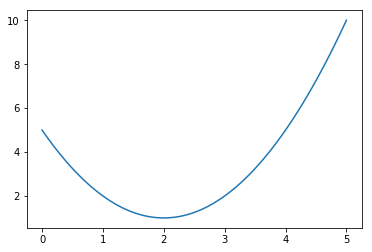

In [3]:
def f(x):
    return (x-2)**2+1
xs = np.linspace(0,5,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)

2) If we start at $x=4$, which way should we move and why?

In [6]:
go left because we have to follow the slop to minimize

SyntaxError: invalid syntax (<ipython-input-6-f6e9d390c263>, line 1)

3)If the step size is constants = 1.1, what does the update rule look like?

$$x_{n+1} = \ldots$$

$x_{n+1} = x-\frac{size*f'(x)}{abs(f'(x))}$

4)Let try it with step size = 1.1. For 10 iteration. Print and plot your point as you go. Can you understand the behavior?

1.7999999999999998


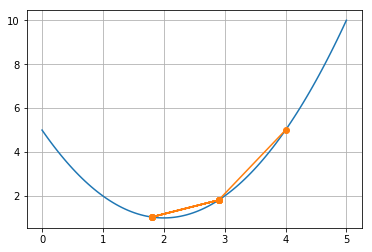

In [7]:
def f(x):
    return (x-2)**2+1
def f1(x):
    return 2*(x-2)

testx = []
testy = []
def gradient(x,size,n):
    for i in range(n):
        testx.append(x)
        testy.append(f(x))
        x = x-(size*f1(x))/abs(f1(x))
#         print("x: ",x, "f(x): ", f(x))
        plt.plot(x,f(x),'.',color='r')
    return x

print(gradient(4,1.1,10))

xs = np.linspace(0,5,100)
ys = [f(x) for x in xs]       #plot function line
plt.plot(xs,ys)
plt.plot(testx,testy,'o-')   #plot results 
plt.grid()

5)Now let's try step size=0.01 for 100 iteration. Print and plot your point as you go. Can you understand the behavior?

3.0000000000000213


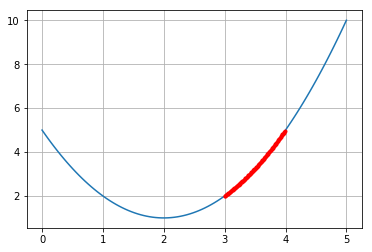

In [8]:
xs = np.linspace(0,5,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.grid()
print(gradient(4,0.01,100))

6) When do we want the step size to be small and when do you want the step size to be big?

Direction has to do with slope 
    slope(-) -> increase guess 
    slope(+) -> decrease guess 
Oscillate around the minimum 
    width/Accuracy = stepsize 
Small step size for accurate anwser 
    need a lot of iter. -> slowww 
When we are "far" -> Big stepsize 
    Slope is Big
When we are "near" -> Small stepsize 
    Slope is small
  
    stepsize = h(slope) = lambda*abs(f'(x))   ; lambda -> learning rate 

7) What function kind of does that?

$x_{n+1}=x_{n}-\lambda f'(x)$

8)If we use that function, what does the update rule looks like.

In [9]:
def gradient(x,lmd,n):
    for i in range(n):
        x = x-lmd*f1(x)
        plt.plot(x,f(x),'.',color='r')
    return x

9) Try it with $\lambda=0.1$. Print and Plot to see what happens?

2.2147483647999997


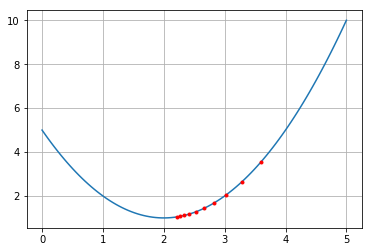

In [10]:
def gradient(x,lmd,n):
    for i in range(n):
        x = x-lmd*f1(x)
        plt.plot(x,f(x),'.',color='r')
    return x

xs = np.linspace(0,5,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.grid()

print(gradient(4,0.1,10))

10) Try it with $\lambda = 1.1$. For 4 iterations. Can you see how it goes?

6.147200000000002


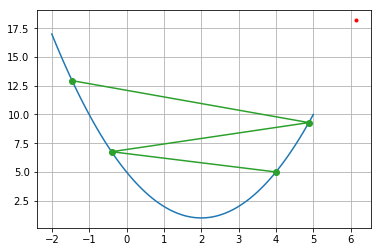

In [11]:
lx = []
ly = [] 
def gradient(x,lmd,n):
    for i in range(n):
        lx.append(x)
        ly.append(f(x))
        x = x-lmd*f1(x)
        plt.plot(x,f(x),'.',color='r')
    return x

xs = np.linspace(-2,5,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.plot(lx,ly,'o-')
plt.grid()
print(gradient(4,1.1,4))
plt.plot(lx,ly,'o-')

###Multi-Dimension Gradient Descent

1) Let us consider the function.
$$f(x,y) = (x-2)^2 + xy + 2y + 1$$
Make the 3D plot.

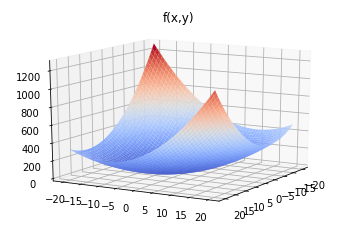

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
def f(x,y):
    return (x-2)**2+x*y+y**2+1
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.gca().view_init(elev=15., azim=30)
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('f(x,y)')

2) Plot the contour.

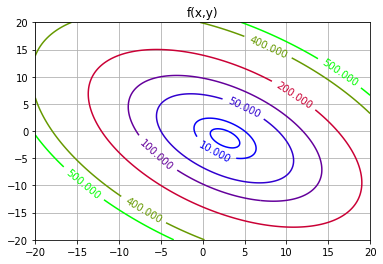

In [13]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return (x-2)**2+x*y+y**2+1

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

$\vec{\nabla} = f,_x \hat{x}+f,_v \hat{y}$

$\Delta\vec{r}= \Delta{x}\hat{x}+\Delta{y}\hat{y}$

$\Delta{f} = \vec{\nabla}f\cdot \Delta \vec{r}$

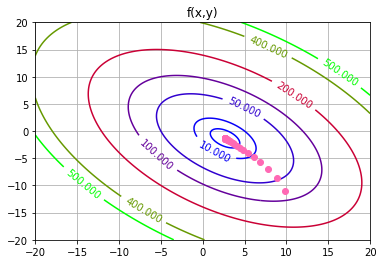

In [14]:
def gradientf(v):
    x, y = v
    return np.array([2*(x-2)+y, x+2*y])

v = (10,-15)
lmd = 0.2
for i in range(100):
    v = v-lmd*(gradientf(v))
    plt.plot(v[0],v[1],'o',color='pink')
        
ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

3)Where do you think the minimum is?

4)What is the gradient at (10,-15)? Use plt.arrow to plot arrow.

(0, 2)

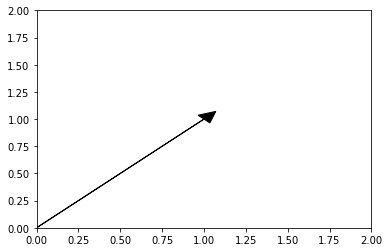

In [15]:
plt.arrow(0,0,1,1,head_width=0.1, head_length=0.1,fc='k',ec='k')
plt.xlim(0,2)
plt.ylim(0,2)

5) If we want to minimize the function which way should we go? Find the unit vector in that direction.

6) What should your update rule look like? Use vector addition.

7) Use what we learn in 1D. How far should we go? What should the update rule really look like?

8) Use $\lambda = 0.1$ and see where the points go

###Linear Regression Revisited

Let us consider the problem of findind a line that pass through the points.

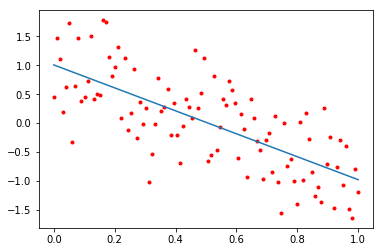

In [16]:
import scipy.optimize

np.random.seed(123)
n = 100
dx = np.linspace(0,1,n)
dy = -2*dx + 1 + np.random.randn(n)/2
plt.plot(dx,dy,'.r')

def cost(x):
    m, c = x
    return sum((m*dx+c-dy)**2)

'''
# partial difffff   gradient descent   
def grad(f,x):
    h=0.001
    fx = (f(x+[h,0])-f(x-[h,0]))/(2*h)
    fy = (f(x+[0,h])-f(x-[0,h]))/(2*h)
    return np.array([fx,fy])


# update rule 
def grad_des(f,x0,l=0.1, n=10000):
    x = np.array(x0)
    for i in range(n):
        x = x - l*grad(f,x)
    return x

m, c = grad_des(cost,[0,0],0.001)
liney = m*dx+c
plt.plot(dx,liney)
'''
res = scipy.optimize.minimize(cost,[-1,2.])    #function and initial guess 
m,c = res.x 
plt.plot(dx,m*dx+c)

1) What exactly are we trying to minimize and why?

2) Minimize and Visualize it.

###Separating Line.

We want to draw a separating line betwen two datasets shown below.

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


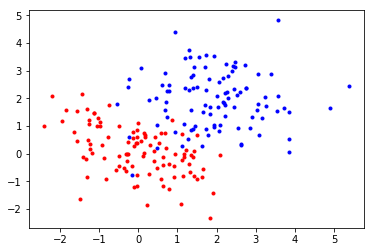

In [17]:
np.random.seed(234)
n1 = 100
n2 = 100
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]
r1, r2 = np.random.multivariate_normal(mean, cov, n1).T
plt.plot(r1, r2, '.r')

mean = [2, 2]
cov = [[1, 0], [0, 1]]
b1, b2 = np.random.multivariate_normal(mean, cov, n2).T
plt.plot(b1, b2, '.b')

c = np.zeros(n1+n2)
c[:n1] = 1.
c[n1:] = 0.
print(c) 

d = np.zeros((n1+n2,2))
d[:n1,0] = r1
d[:n1,1] = r2
d[n1:,0] = b1
d[n1:,1] = b2

In [18]:
print(d)

[[ -1.23086966e+00   1.87319024e-01]
 [  1.56900223e-01   7.64678066e-01]
 [ -1.48876741e+00  -1.64011723e+00]
 [  1.30714602e+00  -3.72480234e-01]
 [  6.74618388e-01   7.50597114e-01]
 [  9.45842687e-01  -1.90182398e-02]
 [  1.65971858e+00  -5.63461720e-01]
 [  1.91304992e+00  -1.43409072e+00]
 [ -1.25215912e+00   1.07673845e+00]
 [ -3.72603272e-01  -5.15851453e-01]
 [  7.14659007e-01   1.93716162e-01]
 [ -1.02708336e-01  -1.22090529e+00]
 [ -1.30358744e+00   1.60276889e+00]
 [  4.27235358e-01   6.16845555e-01]
 [ -2.55860503e-01   3.38542247e-03]
 [ -4.80668572e-01   9.86442249e-01]
 [ -2.69118098e-01   4.10963031e-01]
 [  1.30995360e+00  -6.70156969e-01]
 [  2.80058853e-01  -7.44209215e-01]
 [  1.34634767e+00  -3.55848535e-02]
 [ -1.04263611e+00   9.92166585e-01]
 [ -9.20813174e-01   3.24447804e-01]
 [  1.65228093e-01   6.09060844e-01]
 [  7.81256686e-01  -3.59419357e-01]
 [  1.48687720e+00   6.71134905e-01]
 [ -5.70877282e-01  -5.91032696e-01]
 [ -9.85812833e-01   1.12859760e+00]
 

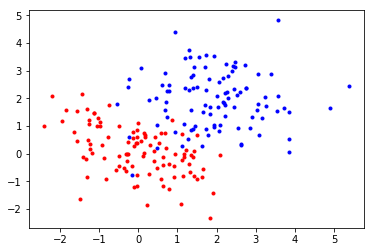

In [19]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

1) How can we model this as a optimization problem?

a: -0.608014704891 b: 1.27794944876


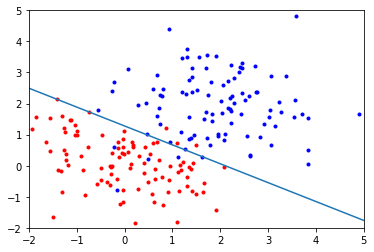

In [28]:
def cost(w):
    a, b = w
    ans = 0
    for dd, cc in zip(d,c):
        x, y = dd
        if (cc > 0.5):  #red
            if y < a*x+b:
                pass
            else: 
                ans += (y-(a*x+b))
        else:          #blue
            if y < (a*x+b):
                ans += ((a*x+b)-y)  
            else:
                pass
    return ans

plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

dx = np.array([-5,5,100])
res = scipy.optimize.minimize(cost,[1.,1.])
a,b = res.x 
plt.plot(dx,a*dx+b)
plt.xlim(-2,5)
plt.ylim(-2,5)

print("a:",a,"b:",b)


2) What equation do we plot?

3) Minimize and plot it to see that you get the right line.

In [32]:
#this is how you make a padded array
nr, nc = d.shape
pd = np.zeros((nr,nc+1))
pd[:,1:] = d
pd[:,0] =  1.0
print (pd[:20])

[[ 1.         -1.23086966  0.18731902]
 [ 1.          0.15690022  0.76467807]
 [ 1.         -1.48876741 -1.64011723]
 [ 1.          1.30714602 -0.37248023]
 [ 1.          0.67461839  0.75059711]
 [ 1.          0.94584269 -0.01901824]
 [ 1.          1.65971858 -0.56346172]
 [ 1.          1.91304992 -1.43409072]
 [ 1.         -1.25215912  1.07673845]
 [ 1.         -0.37260327 -0.51585145]
 [ 1.          0.71465901  0.19371616]
 [ 1.         -0.10270834 -1.22090529]
 [ 1.         -1.30358744  1.60276889]
 [ 1.          0.42723536  0.61684556]
 [ 1.         -0.2558605   0.00338542]
 [ 1.         -0.48066857  0.98644225]
 [ 1.         -0.2691181   0.41096303]
 [ 1.          1.3099536  -0.67015697]
 [ 1.          0.28005885 -0.74420921]
 [ 1.          1.34634767 -0.03558485]]


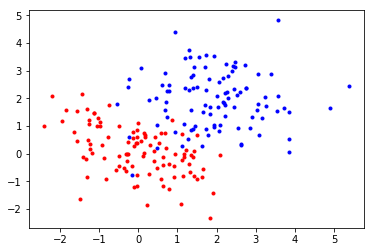

In [68]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

# plt.plot(np.dot(pd,[a,b,1]))